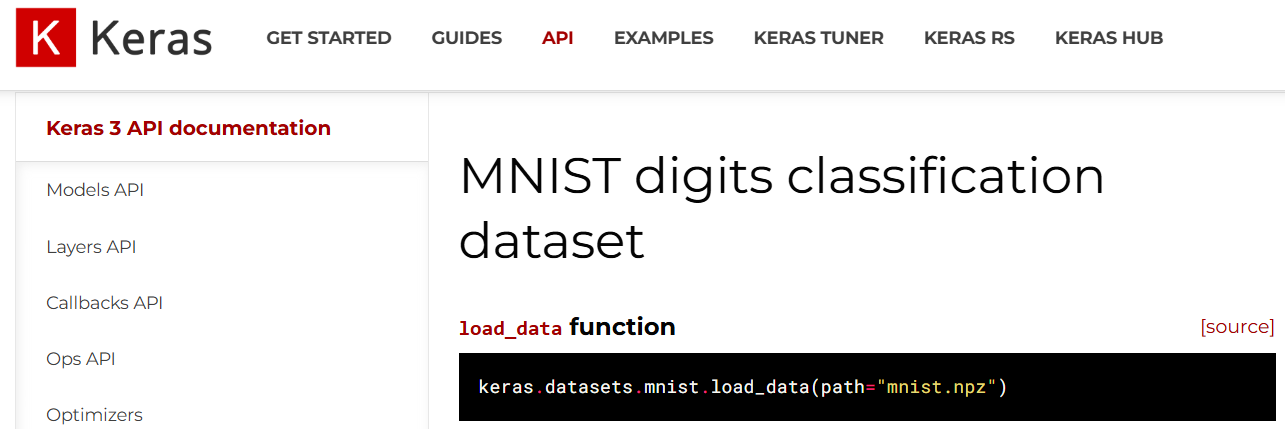

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

### Build neural network

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

### Compilation stage

In [10]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Data preprocessing

In [11]:
train_images = train_images.reshape((60_000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10_000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Model training

In [12]:
model.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8685 - loss: 0.4475
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9645 - loss: 0.1230
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9783 - loss: 0.0751
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9849 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9896 - loss: 0.0356


### Predict some test numbers

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(x=test_digits)
predictions[0]  # First digit prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([8.7321934e-07, 2.6860685e-09, 3.4329958e-05, 8.4009371e-05,
       1.1742518e-12, 3.1101063e-08, 5.6967118e-12, 9.9988008e-01,
       2.2437263e-08, 5.5862631e-07], dtype=float32)

In [15]:
test_labels[0]

7

In [17]:
predictions[0].argmax()

7

### Model evaluation with metrics

In [19]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print(f'test_acc: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9727 - loss: 0.0935
test_acc: 0.9763


In [22]:
print(f'test_loss: {test_loss:.4f}')

test_loss: 0.0791


### Tensors

In [23]:
import numpy as np

In [24]:
x = np.array(5212025)  # Scalar
x

array(5212025)

In [25]:
x.ndim

0

Не путайте пятимерные векторы с пятимерными тензорами! Пятимерный вектор имеет только одну ось (и пять значений на этой оси), тогда как пятимерный тензор имеет пять осей (и любое количество значений на каждой из них). Мерность может обозначать или количество элементов на данной оси (как в случае с пятимерным вектором), или количество осей в тензоре (как в пятимерном тензоре), что иногда может вызывать путаницу.

В глубоком обучении чаще всего используются тензоры от нулевого ранга до четырехмерных, но иногда (например, при обработке видеоданных) дело может дойти и до пятимерных.

In [26]:
train_images.dtype  # Before preprocessing was 'uint8'

dtype('float32')

### Digit visualization

In [27]:
import matplotlib.pyplot as plt

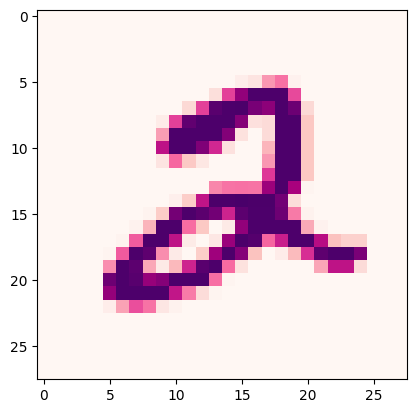

In [39]:
digit = train_images[5].reshape((28, 28))
plt.imshow(X=digit, cmap='RdPu')
plt.show()

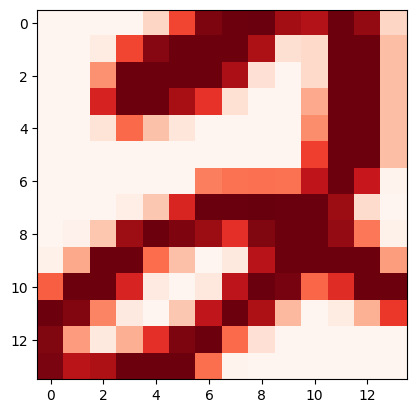

In [43]:
# Center crop
indent = digit.shape[0] // 4
center_crop = digit[indent : -indent, indent : -indent]
plt.imshow(X=center_crop, cmap='Reds')
plt.show()

Модели глубокого обучения не обрабатывают весь набор данных целиком; они разбивают его на небольшие пакеты. 

- **Временные ряды или последовательности** — трехмерные тензоры с формой(образцы, метки_времени, признаки), где каждый образец является последовательностью (длиной метки_времени) векторов признаков;
- **Изображения** — четырехмерные тензоры с формой (образцы, высота, ширина, цвет), где каждый образец является двумерной матрицей пикселей, а каждый пиксель представлен вектором со значениями «цвета»;
- **Видео** — пятимерные тензоры с формой (образцы, кадры, высота, ширина, цвет), где каждый образец является последовательностью (длина равна значению кадры) изображений.

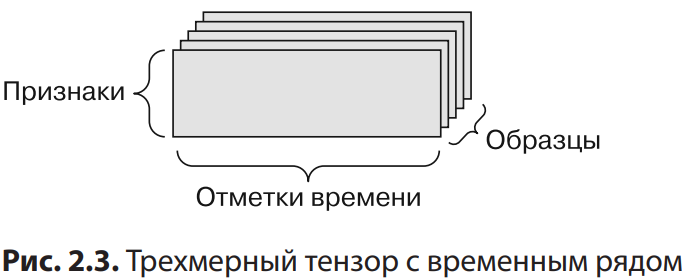

В соответствии с соглашениями ось времени всегда является второй осью (осью с индексом 1).

**Набор данных с ценами акций.** Каждую минуту мы сохраняем текущую цену акций, а также наибольшую и наименьшую цены за минувшую минуту.
То есть каждая минута представлена трехмерным вектором, весь торговый день — матрицей с формой (390, 3) (где 390 — длительность торгового дня в минутах), а данные за 250 дней — трехмерным тензором формы
(250, 390, 3). В таком случае каждый образец представляет данные за один торговый день.

Даже притом, что черно-белые изображения (как в наборе данных MNIST) имеют только один канал цвета и могли бы храниться в двумерных тензорах, по соглашениям тензоры с изображениями всегда имеют три измерения, где для
черно-белых изображений отводится только один канал цвета. 

Пакет со 128 цветными изображениями — тензор с формой (128, 256, 256, 3) (рис. 2.4)

соглашение «канал следует последним» (используется в TensorFlow)
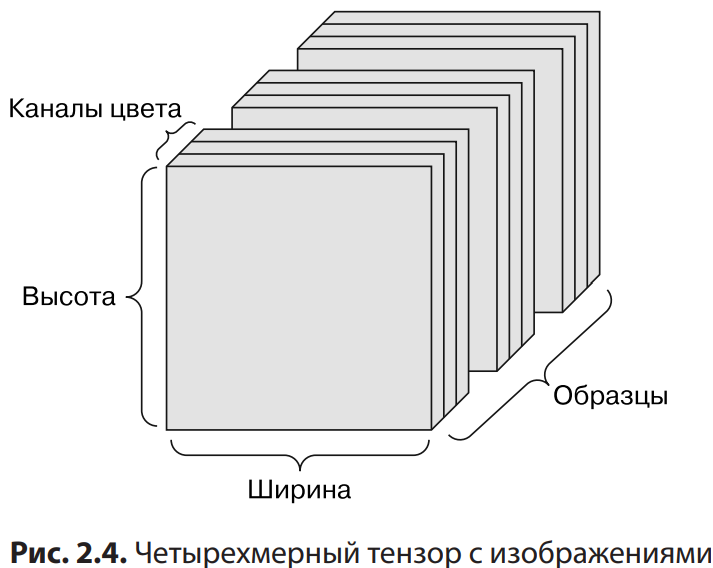

**Видеоданные** — один из немногих типов данных, для хранения которых требуются пятимерные тензоры. Видео можно представить как последовательность кадров, где каждый кадр — цветное изображение. Каждый кадр можно сохранить
в трехмерном тензоре (высота, ширина, цвет), соответственно, их последовательность можно поместить в четырехмерном тензоре (кадры, высота, ширина, цвет), а пакет разных видеороликов — в пятимерном тензоре с формой (образцы,
кадры, высота, ширина, цвет).

Например, 60-секундный видеоклип с разрешением 144 × 256 и частотой четыре кадра в секунду будет состоять из 240 кадров. Для сохранения пакета из четырех таких клипов потребуется тензор с формой (4, 240, 144, 256, 3).
То есть 106 168 320 значений! Если предположить, что dtype тензора определен как float32, тогда для хранения каждого значения понадобится 32 бита, а для всего тензора соответственно 405 Мбайт. Мощно! Видеоролики, с которыми
вам придется столкнуться в реальной жизни, намного легковеснее, потому что они не хранятся как коллекции значений типа float32 и обычно подвергаются значительному сжатию (как, например, формат MPEG).

**relu(x)** — эквивалентна операции _max(x, 0)_; название relu происходит от английского rectified linear unit (блок линейной корректировки).